# Level 1: DATA VISUALIZATION

## Video Game Sales Analysis

### Dataset Overview
This dataset contains sales data for video games across various platforms and regions. Each entry in the dataset represents a video game, including details such as the game's rank in sales, name, platform, release year, genre, publisher, and sales figures in North America (NA), Europe (EU), Japan (JP), and other regions. Additionally, it includes global sales figures.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for seaborn plots
sns.set()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the data
df = pd.read_csv('/vgsales.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display a concise summary of the dataframe
print(df.info())
# Show summary statistics
print(df.describe())



   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

In [4]:
# Check for missing values in the dataset
print(df.isnull().sum())


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [5]:
# Fill missing 'Year' values with the median year
df['Year'].fillna(df['Year'].median(), inplace=True)

# Convert 'Year' to integer to avoid decimal years
df['Year'] = df['Year'].astype(int)


In [6]:

# Remove rows where 'Publisher' is missing
df.dropna(subset=['Publisher'], inplace=True)


In [7]:
# Verify that there are no more missing values
print(df.isnull().sum())


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [8]:
# Display data types of all columns to confirm changes
print(df.dtypes)


Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


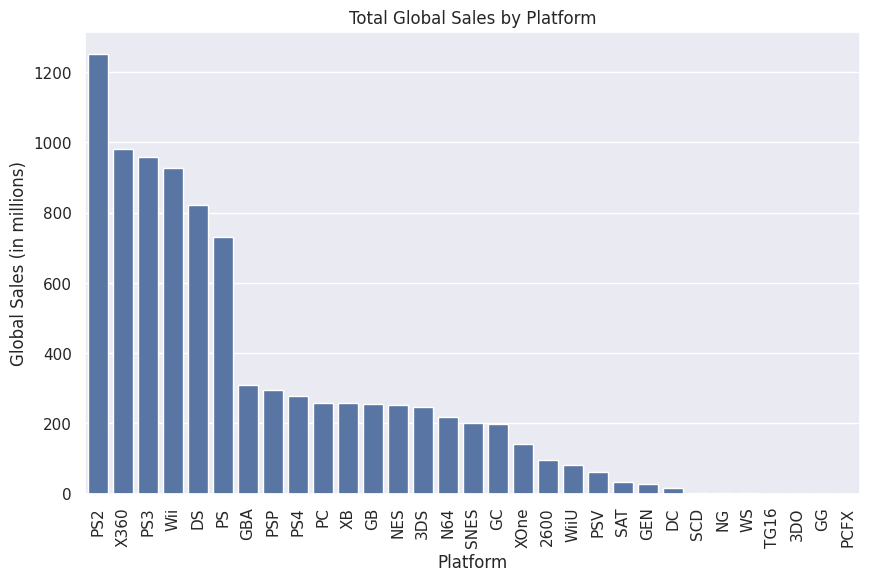

In [9]:
# Total sales per platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Bar chart for platform sales
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()


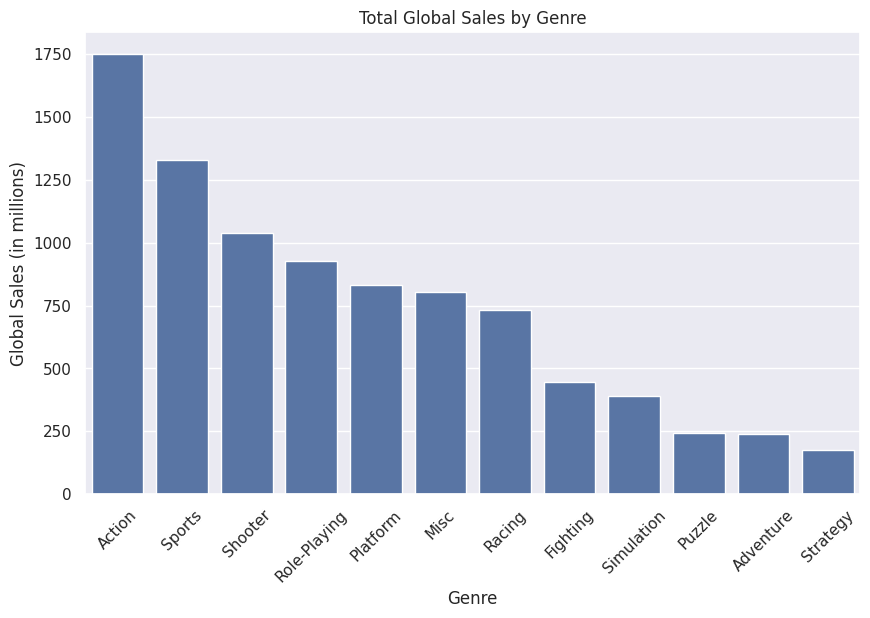

In [10]:
# Total sales per genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Bar chart for genre sales
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


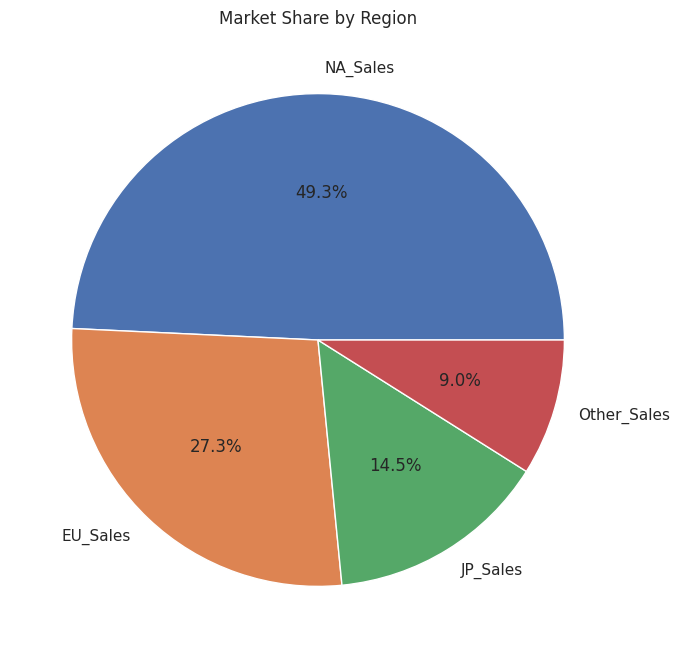

In [11]:
# Sum sales by region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Pie chart for regional sales
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Market Share by Region')
plt.show()


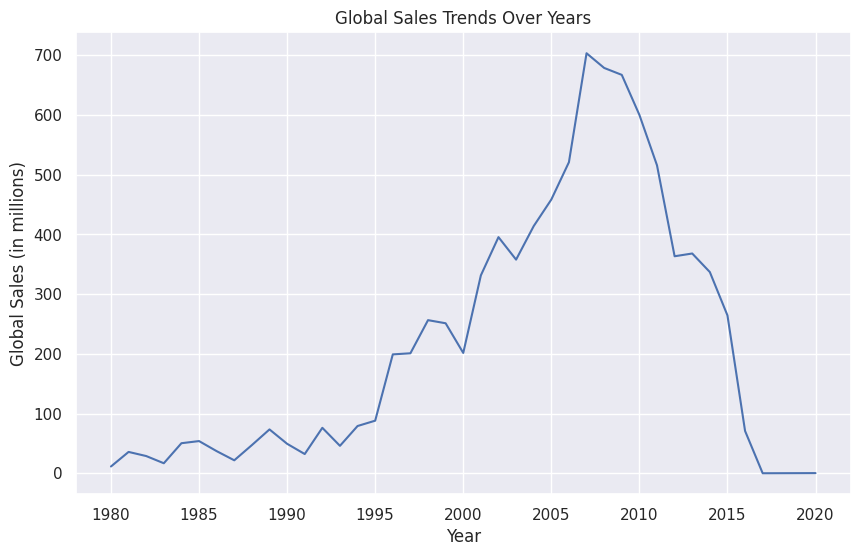

In [12]:
# Total global sales per year
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Line plot for yearly trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Global Sales Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()


# Data Exploration

#### Distribution of Sales Across Different Regions
- **Purpose**: To examine how video game sales are distributed within North America, Europe, Japan, and other regions.
- **Findings**: These histograms show that sales are highly skewed, with a few games achieving very high sales while the majority have relatively low sales figures. This indicates a market dominated by a handful of successful titles.


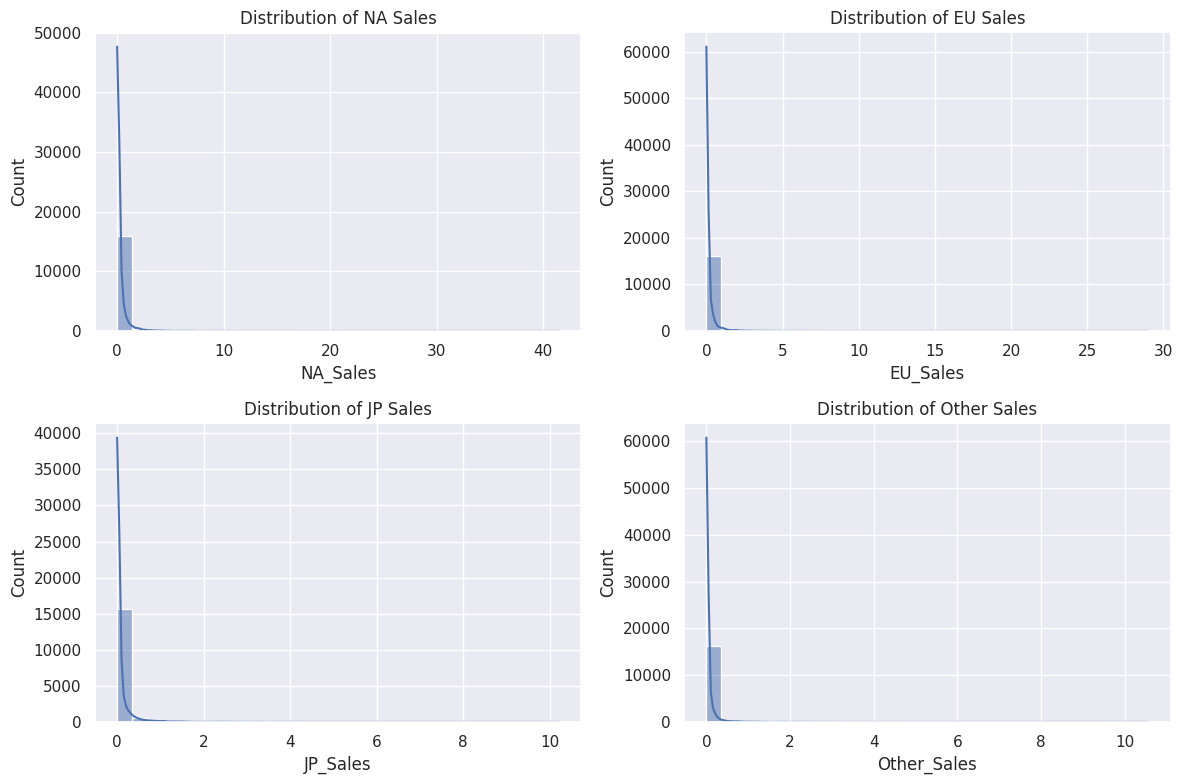

In [13]:
# Histograms for sales distribution in different regions
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['NA_Sales'], bins=30, kde=True)
plt.title('Distribution of NA Sales')

plt.subplot(2, 2, 2)
sns.histplot(df['EU_Sales'], bins=30, kde=True)
plt.title('Distribution of EU Sales')

plt.subplot(2, 2, 3)
sns.histplot(df['JP_Sales'], bins=30, kde=True)
plt.title('Distribution of JP Sales')

plt.subplot(2, 2, 4)
sns.histplot(df['Other_Sales'], bins=30, kde=True)
plt.title('Distribution of Other Sales')

plt.tight_layout()
plt.show()


#### Sales Trends Over Time by Genre
- **Purpose**: To track how the popularity and sales of different game genres have evolved over the years.
- **Findings**: The line plot helps identify trends such as rising or declining popularity of


<ipython-input-14-b94e353297c5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=df, estimator=sum, ci=None)


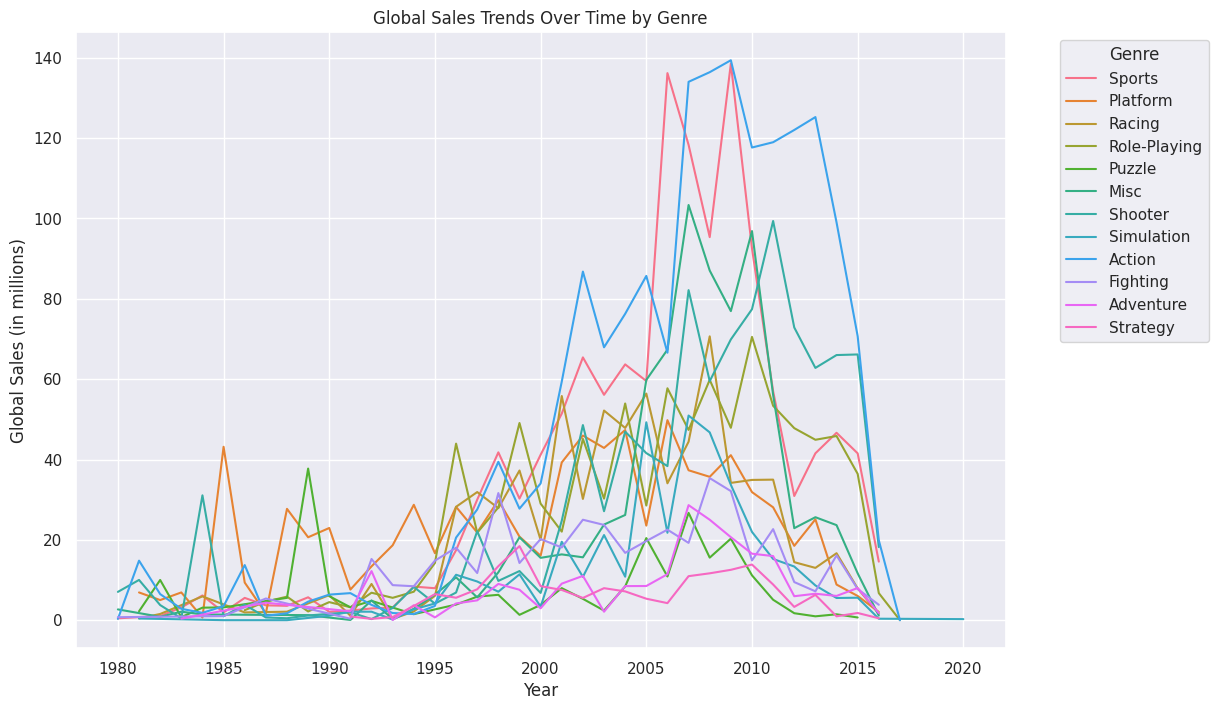

In [14]:
# Line plot of sales over time by genre
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=df, estimator=sum, ci=None)
plt.title('Global Sales Trends Over Time by Genre')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Relationship Between North American and European Sales
- **Purpose**: To explore the correlation between sales figures in North America and Europe.
- **Findings**: The scatter plot reveals how closely related these markets are. A positive correlation suggests that games performing well in North America also tend to perform well in Europe, valuable for strategic planning in marketing and development.


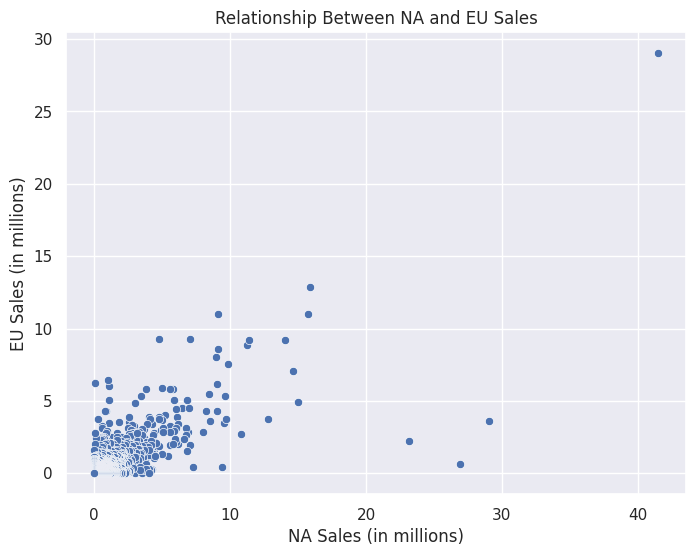

In [15]:
# Scatter plot to visualize the relationship between NA and EU sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df)
plt.title('Relationship Between NA and EU Sales')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('EU Sales (in millions)')
plt.show()


#### Effect of Platform on Global Sales
- **Purpose**: To analyze how different gaming platforms perform in terms of global sales.
- **Findings**: The boxplot provides insights into the median sales per platform and the range of sales, highlighting platforms with higher sales and greater variability. It also reveals outliers, indicating exceptionally successful games.


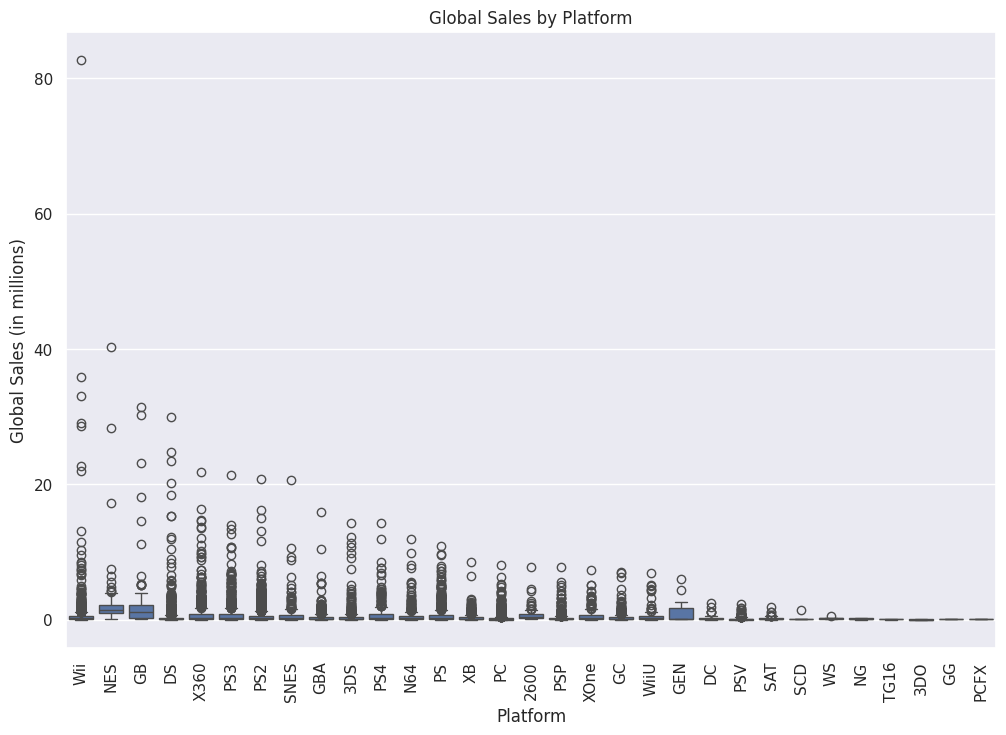

In [16]:
# Boxplot to analyze the effect of platform on global sales
plt.figure(figsize=(12, 8))
sns.boxplot(x='Platform', y='Global_Sales', data=df)
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()
